<a href="https://colab.research.google.com/github/KATTAakhila123/stress-detection/blob/main/ml_stress_detection-main/ml_stress_detection-main/stress_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Human Stress Detection
Using physiological data to detect human stress levels.

#### Features
Humidity
Temperature
Step count
Stress levels

Based on the human’s physical activity, the stress levels of the human being are detected and analyzed here. A dataset of 2001 samples is provided for human body humidity, body temperature and the number of steps taken by the user. Three different classifications of stress are performed, low stress, normal stress, and high stress. More information on how this data is analyzed can be found at “L. Rachakonda, S. P. Mohanty, E. Kougianos, and P. Sundaravadivel, “Stress-Lysis: A DNN-Integrated Edge Device for Stress Level Detection in the IoMT,” IEEE Trans. Conum. Electron., vol. 65, no. 4, pp. 474–483, 2019.”

### Numerical Exploratory Data Analysis

In [9]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/janprince/ml_stress_detection/main/stress_lysis.csv")

data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [10]:
data.tail()

,Humidity,Temperature,Step count,Stress Level
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0
2000,16.87,85.87,50,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [13]:
data["Stress Level"].value_counts()

,count
Stress Level,
1,790
2,710
0,501


### Visual Exploratory Data Analysis
Finding correlations

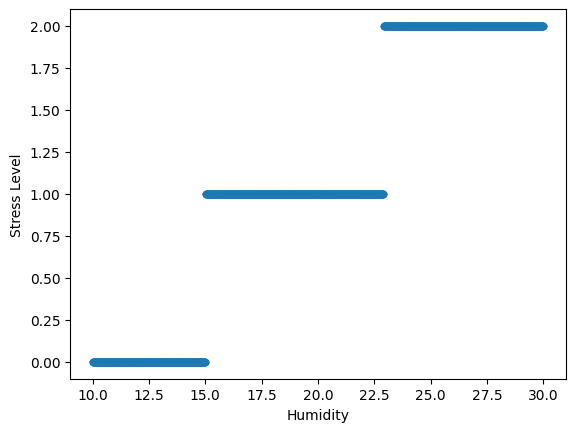

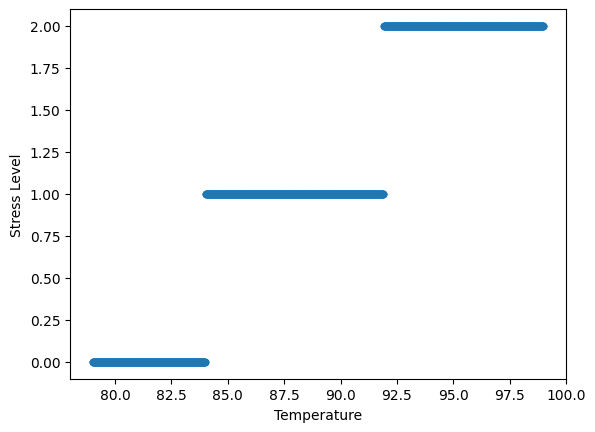

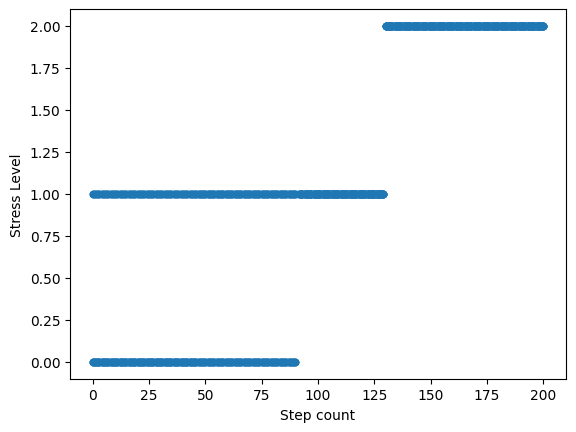

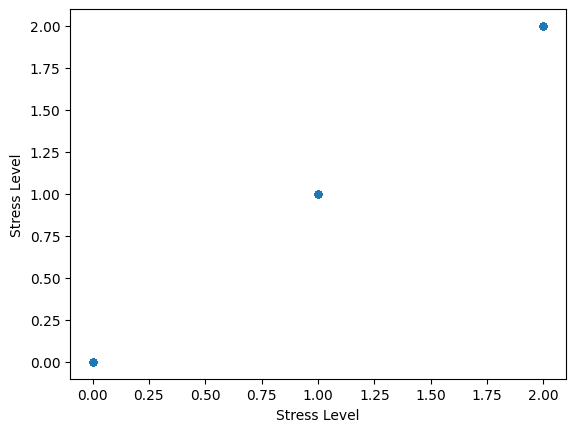

In [14]:
features = list(data.columns.values)
for f in features:
  data.plot(x=f, y="Stress Level", kind="scatter")

From the above plot, it is likely for a human to have a stress level of 0 when the body's humidity lies anywhere between 10.0 and 15.0.

A stress level of 1 if humidity is between 15.0 and 23.00
and a stress level of 3 if humidity is between 23.00 and 30.00

### Splitting datasets

In [15]:
from sklearn.model_selection import train_test_split

# split labels from data
X = data.drop(["Stress Level"], axis=1)
y = data["Stress Level"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Training a model on training data

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=5)

# fit regression model to training data
model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# accuracy of predict on training set
model.score(X_train, y_train)

0.9941666666666666

In [ ]:
# accuracy using cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.97916667, 0.95833333, 0.9875    , 0.9875    , 0.99166667])

### Hyperparameter Tuning

In [18]:
# Using GridSearch()
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_cv = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned Decision Tree Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best score is 0.9908333333333335


### Predicting the model on the Test set

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting on the test set
y_pred = knn_cv.predict(X_test)

# percentage accuracy
score = knn_cv.score(X_test, y_test)

# Cost (MSE) Mean Squared error
mse = mean_squared_error(y_test, y_pred)
mse = np.sqrt(mse)

print(f"Percentage Score: {score}")
print(f"Cost / MSE: {mse}")

Percentage Score: 0.9925093632958801
Cost / MSE: 0.0865484644815831


### Preparing a classification report.

In [20]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99       216\n           1       0.98      1.00      0.99       303\n           2       1.00      1.00      1.00       282\n\n    accuracy                           0.99       801\n   macro avg       0.99      0.99      0.99       801\nweighted avg       0.99      0.99      0.99       801\n'